In [1]:
# ! pip install geopandas

In [5]:
from math import atan2, cos, radians, sin, sqrt

# import geopandas as gpd
import numpy as np
import pandas as pd
# import shapely
from tqdm import tqdm

In [3]:
def plotmap(df):
    points = []

    for ix, row in df.iterrows():
        lat = row["latitude"]
        lon = row["longitude"]
        assert type(lon) == float
        assert type(lat) == float
        points.append(shapely.geometry.Point(lon, lat))

    gdf = gpd.GeoDataFrame(df, geometry=points, crs={"init": "EPSG:4326"})

    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    base = world.plot(color="white", edgecolor="black")
    gdf.plot(ax=base)


def adddist(df, newlat, newlon):

    newdf = df.copy()

    # Distance function between two lat/lon
    def getDist(lat1, lon1, lat2, lon2):
        R = 6373.0

        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        return R * c

    # Apply distance function to dataframe
    newdf["dist"] = list(
        map(
            lambda k: getDist(
                df.loc[k]["latitude"], df.loc[k]["longitude"], newlat, newlon
            ),
            df.index,
        )
    )

    return newdf

In [6]:
df = pd.read_pickle("/app/_work/dataset-all_m1_r3.pickle").reset_index(drop=True)

In [ ]:
df['_ym_date_'] = list(map(lambda x: df.loc[x]['_year'] * 12 + df.loc[x]['_month'], df.index))

In [10]:
df2 = adddist(df, 38.49, -119.95)  # SNE california

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


238


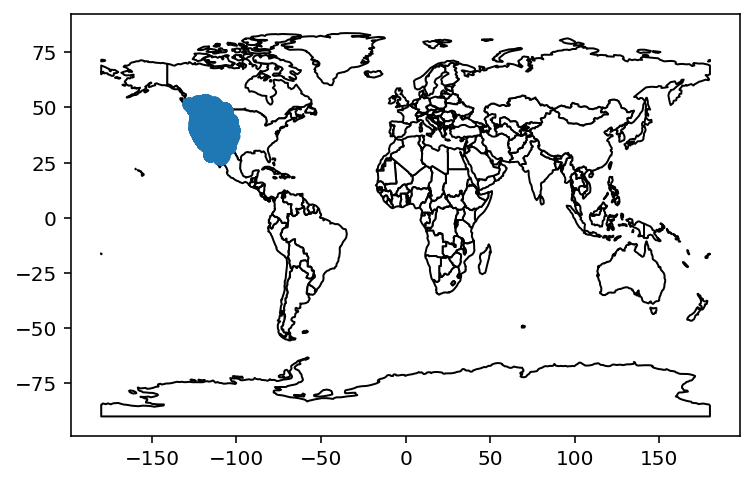

In [8]:
df3 = df2[df2["dist"] < 1.61 * 1000]
plotmap(df3)
print(len(set(df3["_primary_labels"])))

In [9]:
locs = [[5.57, -75.85], [10.12, -84.51], [38.49, -119.95], [42.47, -76.45]]

In [18]:
d = 250  # mi
labels = set()

for l in tqdm(locs):
    df2 = adddist(df, l[0], l[1])
    df3 = df2[df2["dist"] < 1.61 * d]
    labels.update(set(df3["_primary_labels"]))

100%|██████████| 4/4 [02:08<00:00, 32.11s/it]


In [19]:
print(len(labels))

382


In [1]:
df

NameError: name 'df' is not defined

In [1]:
from src.config import c
from src.data_utils import read_soundscapes_info


def _str_date_to_ym_date(x):
    x = str(x)
    return int(x[0:4]) * 12 + int(x[4:6])

def _calc_miles(df, newlat, newlon):

    newdf2 = df.copy()

    # Distance function between two lat/lon
    def getDist(lat1, lon1, lat2, lon2):
        R = 6373.0

        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        return R * c

    # Apply distance function to dataframe
    newdf2["dist"] = list(
        map(
            lambda k: getDist(
                df.loc[k]["latitude"], df.loc[k]["longitude"], newlat, newlon
            ),
            df.index,
        )
    )

    return newdf2


ss_info = read_soundscapes_info(c["COMPETITION_DATA"] + "/test_soundscapes")

dates_df = pd.read_csv(
    c["COMPETITION_DATA"] + "/test_soundscapes/test_set_recording_dates.csv"
)

dates_df["date"] = list(map(_str_date_to_ym_date, dates_df["date"]))

for k, v in ss_info.items():
    dates = sorted(list(dates_df[dates_df["site"] == k]["date"]))
    ss_info[k]["ymdates_range"] = [dates[0], dates[-1]]
